<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Global Terrorism (1970 - 2017)
#### By. Ryunhee Kim
---

#### Table of Contents:
1. Data Import & Data Clean Up


2. Exploratory Analysis:
    * 2.1 Has the amount of attacks increased during recent years?
    * 2.2 Where do the terrorist attacks take place?
    * 2.3 What is the number of fatalities by countries?
    * 2.4 Which attack types are popular?
    * 2.5 What is the rate of success?


3. Predictive Analysis:
    * 3.1 Can casualties be predicted?
    * 3.2 Can the suceess of an attack be predicted?


4. Conclusion:
    * 4.1 Limitations/Challenges
    * 4.2 Conclusion

### 1. Data Import & Data Clean Up

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

Source: https://www.kaggle.com/START-UMD/gtd

In [4]:
path = 'C:/Users/rkim1/Documents/GA/Final-project/globalterrorismt.csv'
global_org = pd.read_csv(path, sep=',', engine='python')

#### Understand the Data


In [3]:
global_org.shape

(181691, 135)

In [4]:
global_org.isnull().sum().sort_values(ascending=False).head(10)

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
claimmode3          181558
claimmode3_txt      181558
gsubname2           181531
claim3              181373
guncertain3         181371
dtype: int64

#### Cleaning the Data
There are 135 columns to this data, so I went through all of them to find which columns I will be using for this project.

In [5]:
glb = global_org[['eventid','iyear','imonth','iday','country_txt','region_txt','city','latitude','longitude',
                  'success','suicide','attacktype1_txt','targtype1_txt','gname','weaptype1_txt', 'property',
                 'nkill','nkillus','nwound']]  

glb = glb.rename(
        columns = {'eventid': 'id','iyear': 'year','imonth': 'month','iday':'day','country_txt':'country',
                   'region_txt': 'region','attacktype1_txt':'attack','targtype1_txt':'target','gname':'group',
                   'weaptype1_txt':'weapon','nkill':'kill','nkillus':'killus', 'nwound':'injuries'})

In [7]:
glb.isnull().sum().sort_values(ascending=False)

killus       64446
injuries     16311
kill         10313
longitude     4557
latitude      4556
city           434
year             0
month            0
day              0
country          0
region           0
success          0
suicide          0
attack           0
target           0
group            0
weapon           0
property         0
id               0
dtype: int64

In [8]:
#filling na with 0
glb['injuries'] = glb['injuries'].fillna(0).astype(int)
glb['kill'] = glb['kill'].fillna(0).astype(int)

### 2. Exploratory Analysis

#### 2.1 Has the amount of attacks increased during recent years?

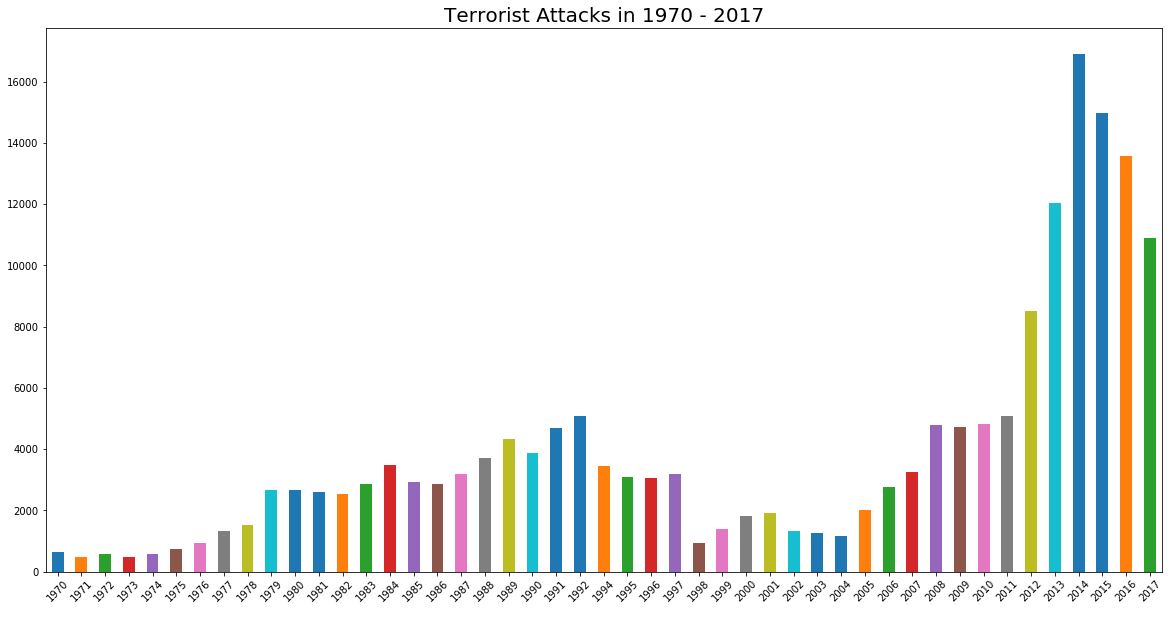

In [36]:
plt.rcParams['figure.figsize'] = (20,10)
year = glb.groupby('year')['id'].count()
year.plot.bar(x="year", y = "id")
plt.title('Terrorist Attacks in 1970 - 2017', fontsize=20)
plt.xticks(rotation=45)
plt.xlabel(' ');

* Since 2012, terrorist activity has significantly increased.

#### 2.2 Where do the terrorist attacks take place?

In [ ]:
#error occured. 

In [21]:
from mpl_toolkits.basemap import Basemap

def worldmap(color, data):

    m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary(fill_color='white')
    m.drawparallels(np.arange(-90.,91.,30.))
    m.drawmeridians(np.arange(-180.,181.,60.))

    lons = data['longitude'].values
    lats = data['latitude'].values

    m.scatter(lons, lats, c = color, latlon=True, cmap= 'viridis', alpha=0.5,s=rcParams['lines.markersize'] ** 1)



IOError: [Errno 22] invalid mode ('r') or filename: 'C:\\Users\rkim1\\Documents\\GA\\Final-project\x08asemap-1.1.0\\lib\\mpl_toolkits\x08asemap\\epsg'

NameError: name 'worldmap' is not defined

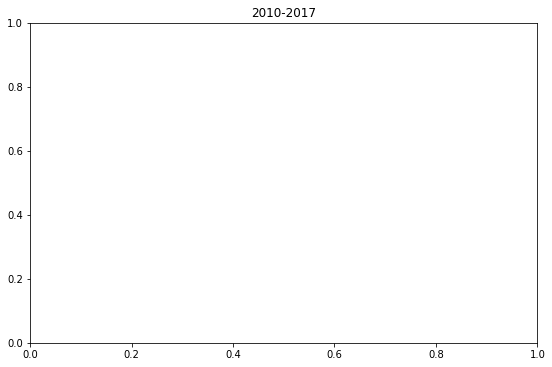

In [10]:
from pylab import rcParams
#rcParams['figure.figsize'] = 18,10

fig = plt.figure(figsize=(20,20))
#plt.title('Terrorist Attack', fontsize = 30, fontweight = 'bold')
map1 = fig.add_subplot(3,2,1)
map1.set_title('2010-2017')
worldmap("black", glb[glb['year'] >= 2010])
map2 = fig.add_subplot(3,2,2)
map2.set_title('2000-2009')
worldmap("black", glb[(glb['year']>= 2000) & (glb['year'] < 2010)])
map3 = fig.add_subplot(3,2,3)
map3.set_title('1990-1999')
worldmap("black", glb[(glb['year']>= 1990) & (glb['year'] < 2000)])
map4 = fig.add_subplot(3,2,4)
map4.set_title('1980-1989')
worldmap("black", glb[(glb['year']>= 1980) & (glb['year'] < 1990)])
map5 = fig.add_subplot(3,2,5)
map5.set_title('1970-1979')
worldmap("black", glb[(glb['year']>= 1970) & (glb['year'] < 1980)]);

''

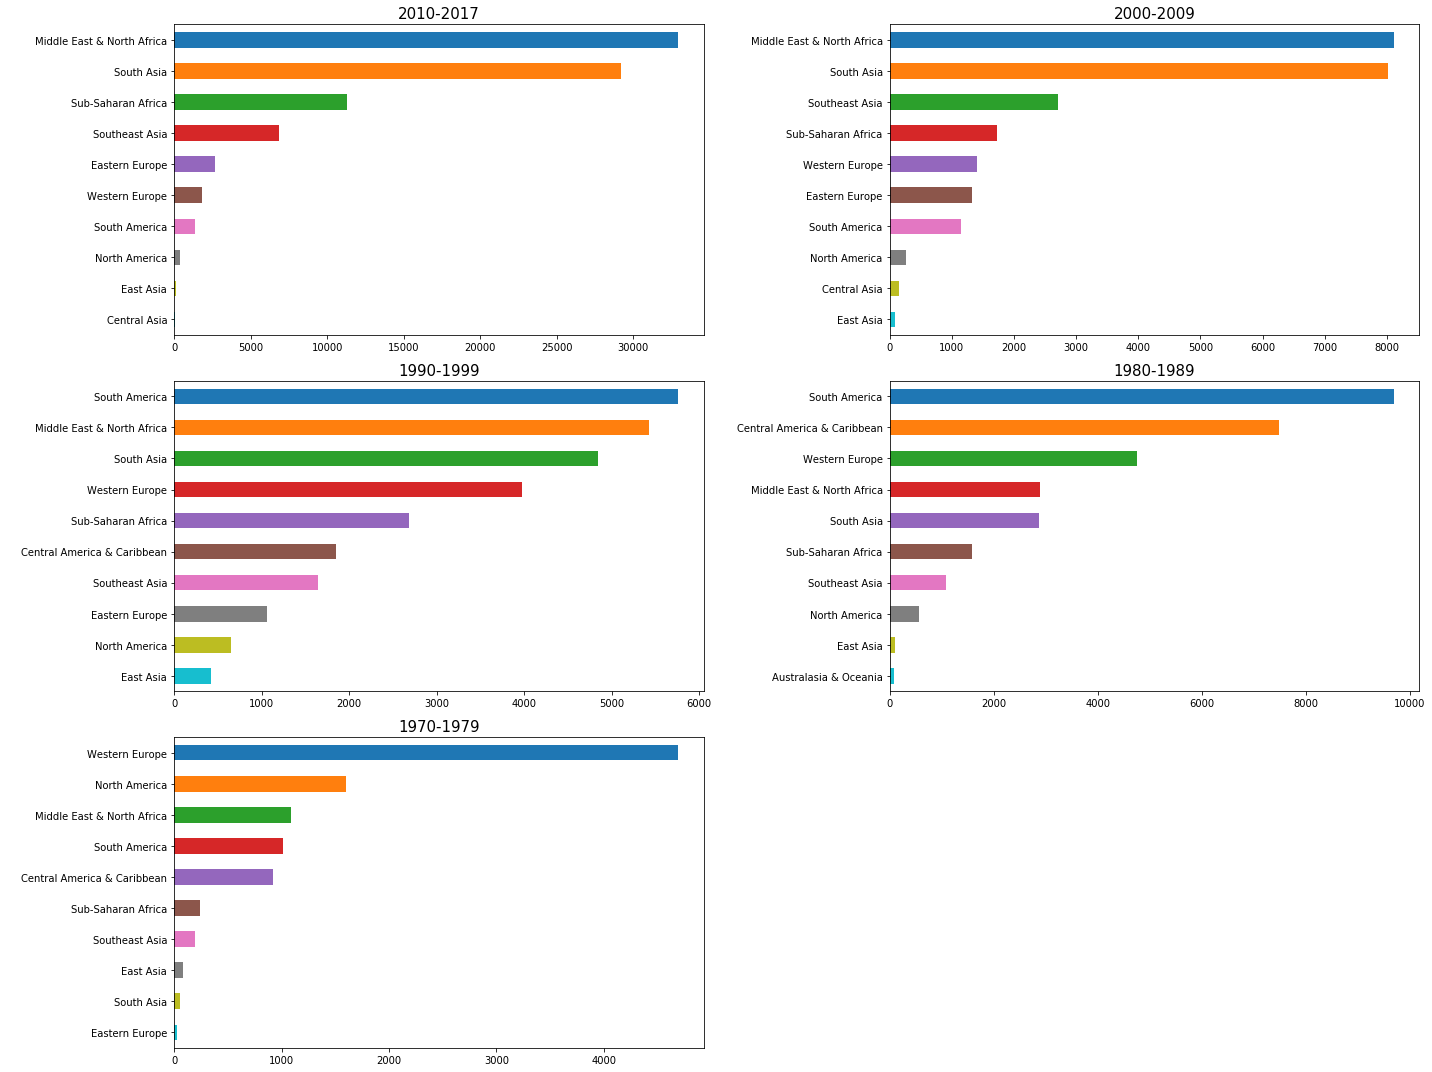

In [38]:
fig = plt.figure(figsize=(20,15))

cont1 = fig.add_subplot(3,2,1)
cont1.set_title('2010-2017',fontsize= 15)
ten_region = glb[glb['year'] >= 2010].groupby('region')['id'].count().sort_values(ascending=False).head(10)
ten_region.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
cont2 = fig.add_subplot(3,2,2)
cont2.set_title('2000-2009',fontsize= 15)
ten_region = glb[(glb['year']>= 2000) & (glb['year'] < 2010)].groupby('region')['id'].count().sort_values(ascending=False).head(10)
ten_region.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
cont3 = fig.add_subplot(3,2,3)
cont3.set_title('1990-1999',fontsize= 15)
ten_region = glb[(glb['year']>= 1990) & (glb['year'] < 2000)].groupby('region')['id'].count().sort_values(ascending=False).head(10)
ten_region.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
cont4 = fig.add_subplot(3,2,4)
cont4.set_title('1980-1989',fontsize= 15)
ten_region = glb[(glb['year']>= 1980) & (glb['year'] < 1990)].groupby('region')['id'].count().sort_values(ascending=False).head(10)
ten_region.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
cont5 = fig.add_subplot(3,2,5)
cont5.set_title('1970-1979',fontsize= 15)
ten_region = glb[(glb['year']>= 1970) & (glb['year'] < 1980)].groupby('region')['id'].count().sort_values(ascending=False).head(10)
ten_region.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
fig.tight_layout()
;

* 1970 - 1979: Terrorist attack concentrated in Western Europe, Northern America Middle East & North Africa.
* 1980 - 1989: Terrorist attack concentrated in South America, Central America & Caribbean, Western Europe all the way to South Asia.
* 1990 - 1999: Terrorist attack concentrated in South America, Central America & Carribean, Western Europe all the way to South Asia.
* 2000 - 2009: Terrorist attack concentrated in Middle East & North Africa, South Asia, Southeast Asia
* 2010 - 2017: Terrorist attack concentrated in Middle East & North Africa, South Asia, Sub-saharan Afria.
    * Number of Terrorist attack in 2010s increased more than 8 times compare to 1970s.

#### Top 10 Affected Countries

''

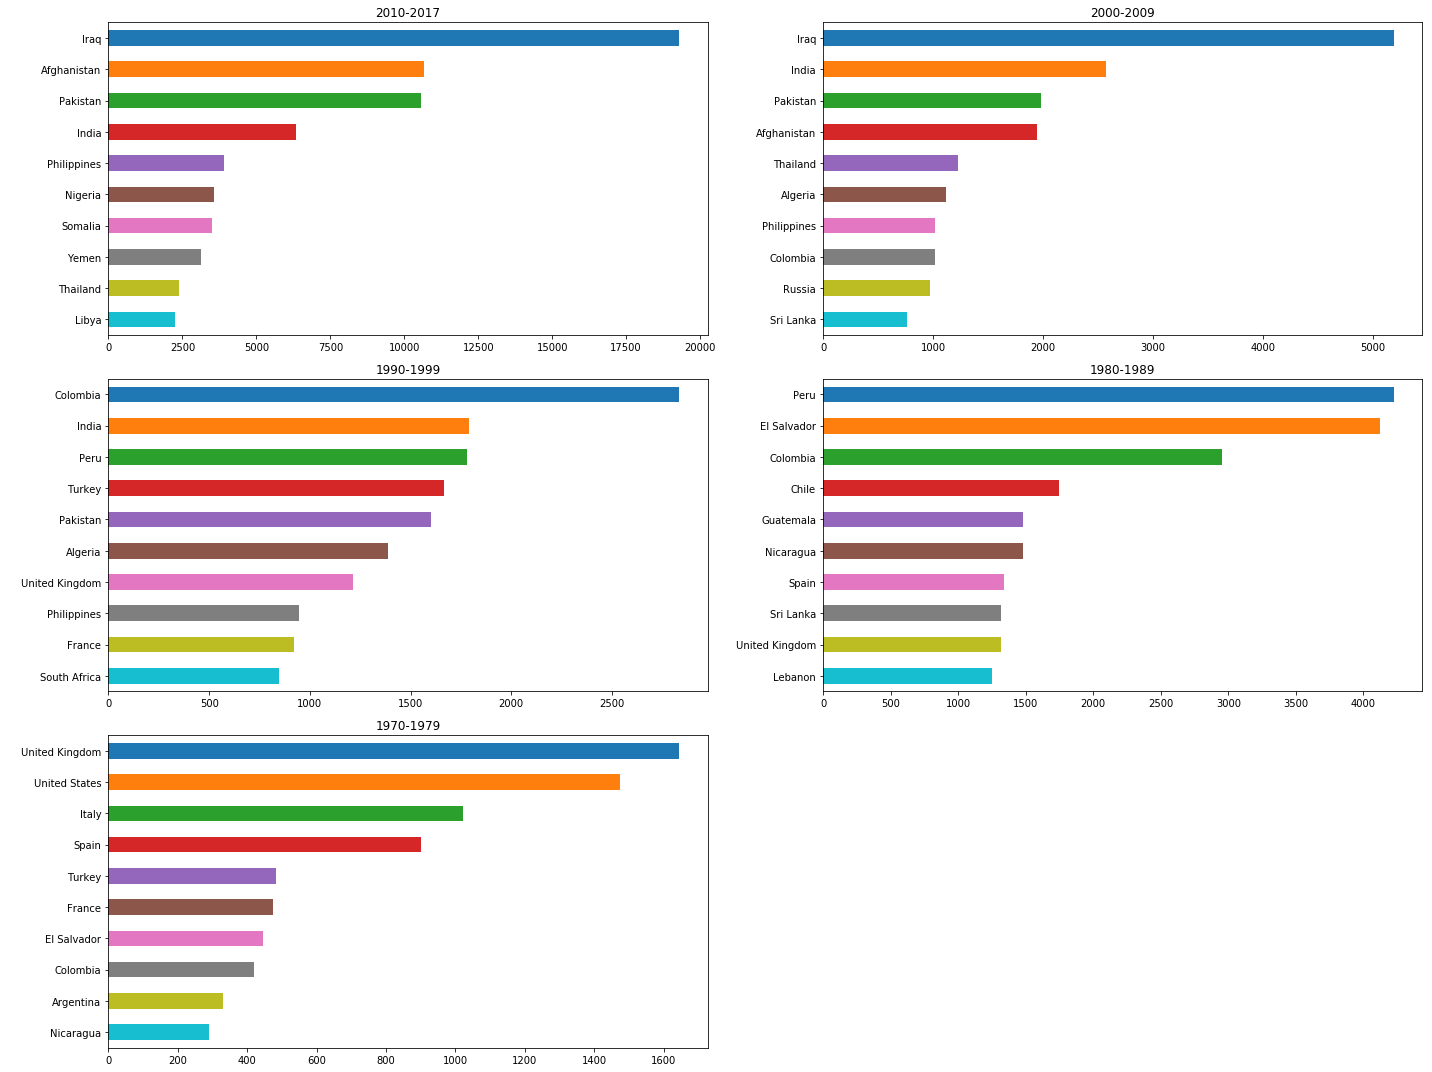

In [11]:
#note: US ranked 17. 
fig = plt.figure(figsize=(20,15))
cont1 = fig.add_subplot(3,2,1)
cont1.set_title('2010-2017')
ten_country = glb[glb['year'] >= 2010].groupby('country')['id'].count().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
cont2 = fig.add_subplot(3,2,2)
cont2.set_title('2000-2009')
ten_country = glb[(glb['year']>= 2000) & (glb['year'] < 2010)].groupby('country')['id'].count().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
cont3 = fig.add_subplot(3,2,3)
cont3.set_title('1990-1999')
ten_country = glb[(glb['year']>= 1990) & (glb['year'] < 2000)].groupby('country')['id'].count().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
cont4 = fig.add_subplot(3,2,4)
cont4.set_title('1980-1989')
ten_country = glb[(glb['year']>= 1980) & (glb['year'] < 1990)].groupby('country')['id'].count().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
cont5 = fig.add_subplot(3,2,5)
cont5.set_title('1970-1979')
ten_country = glb[(glb['year']>= 1970) & (glb['year'] < 1980)].groupby('country')['id'].count().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
fig.tight_layout()
;

* 1970-1979: Top 3 affected countries are United Kingdom, United States, and Italy
* 1980-1989: Top 3 affected countries are Peru, El Salvador, and Colombia
* 1990-1999: Top 3 affected countries are Colombia, India, and Peru
* 2000-2009: Top 3 affected countries are Iraq,India, and Pakistan
* 2010-2017: Top 3 affected countries are Iraq, Afghanistan, and Pakistan

#### 2.3 What is the number of fatalities by countries?

''

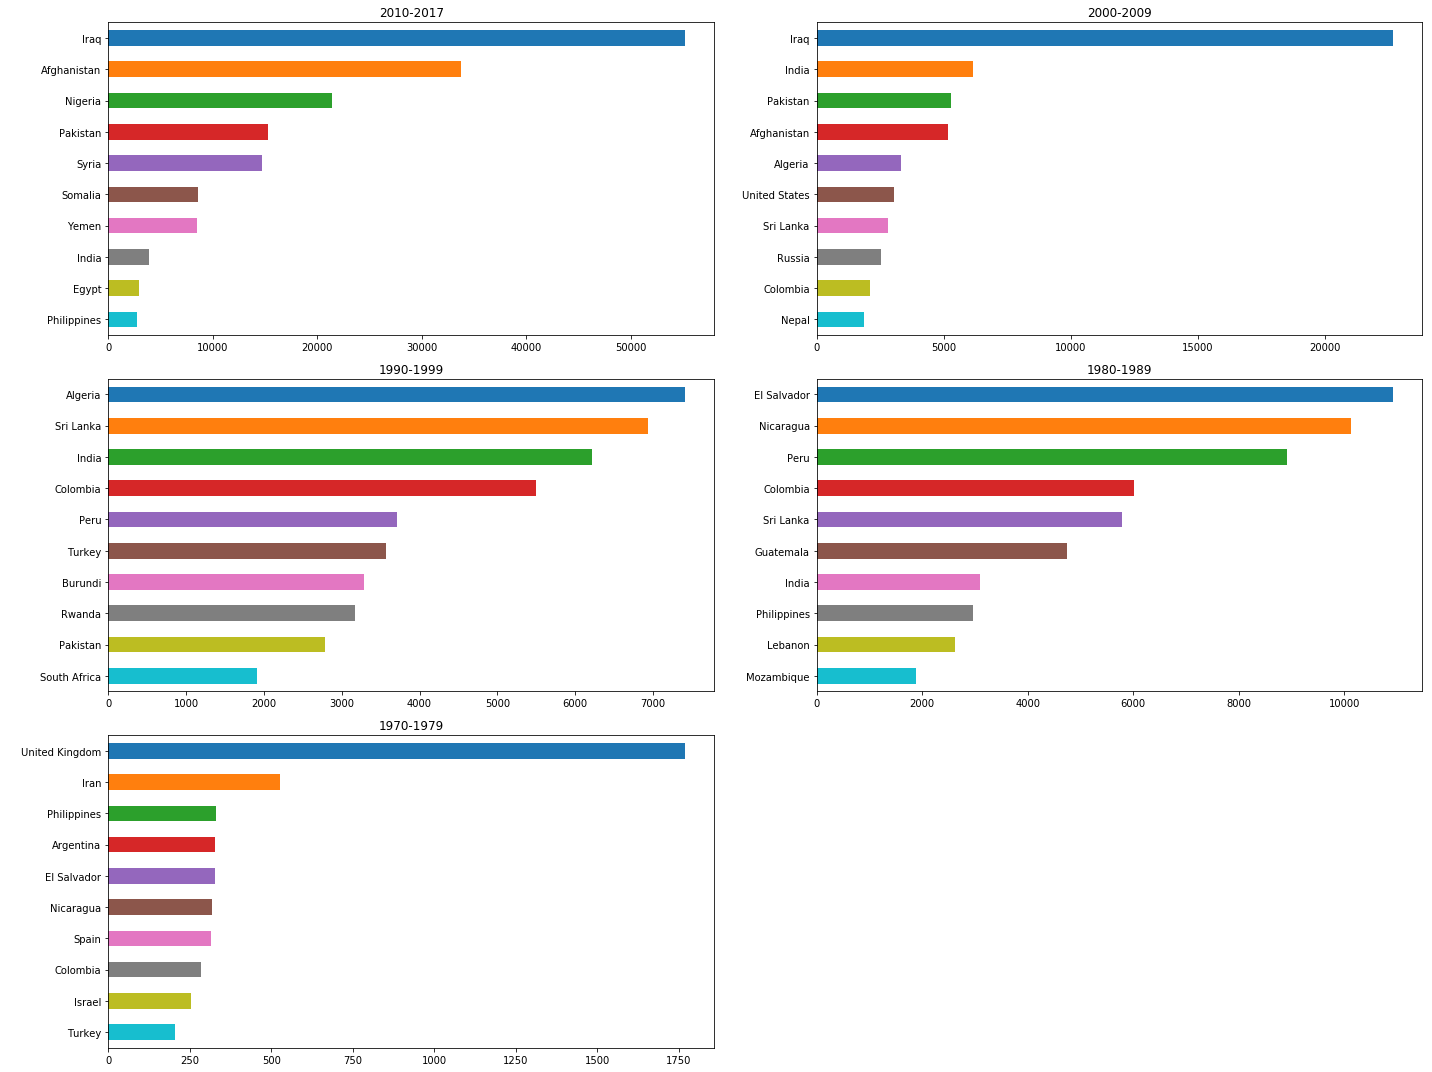

In [12]:
fig = plt.figure(figsize=(20,15))
contk1 = fig.add_subplot(3,2,1)
contk1.set_title('2010-2017')
ten_country = glb[glb['year'] >= 2010].groupby('country')['kill'].sum().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
contk2 = fig.add_subplot(3,2,2)
contk2.set_title('2000-2009')
ten_country = glb[(glb['year']>= 2000) & (glb['year'] < 2010)].groupby('country')['kill'].sum().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
contk3 = fig.add_subplot(3,2,3)
contk3.set_title('1990-1999')
ten_country = glb[(glb['year']>= 1990) & (glb['year'] < 2000)].groupby('country')['kill'].sum().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
contk4 = fig.add_subplot(3,2,4)
contk4.set_title('1980-1989')
ten_country = glb[(glb['year']>= 1980) & (glb['year'] < 1990)].groupby('country')['kill'].sum().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
contk5 = fig.add_subplot(3,2,5)
contk5.set_title('1970-1979')
ten_country = glb[(glb['year']>= 1970) & (glb['year'] < 1980)].groupby('country')['kill'].sum().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="Country", y="id").invert_yaxis()
plt.ylabel(" ")
fig.tight_layout()
;

Total Fatalities:
* 1970 - 1979: 7,128
* 1980 - 1989: 68,193
* 1990 - 1999: 65,083
* 2000 - 2009: 72,962
* 2010 - 2017: 55,204
    * Number of Fatalities in 2010s is 28 times greater than Number of Fatalities in 1970s.

#### 2.4 What is the rate of success?

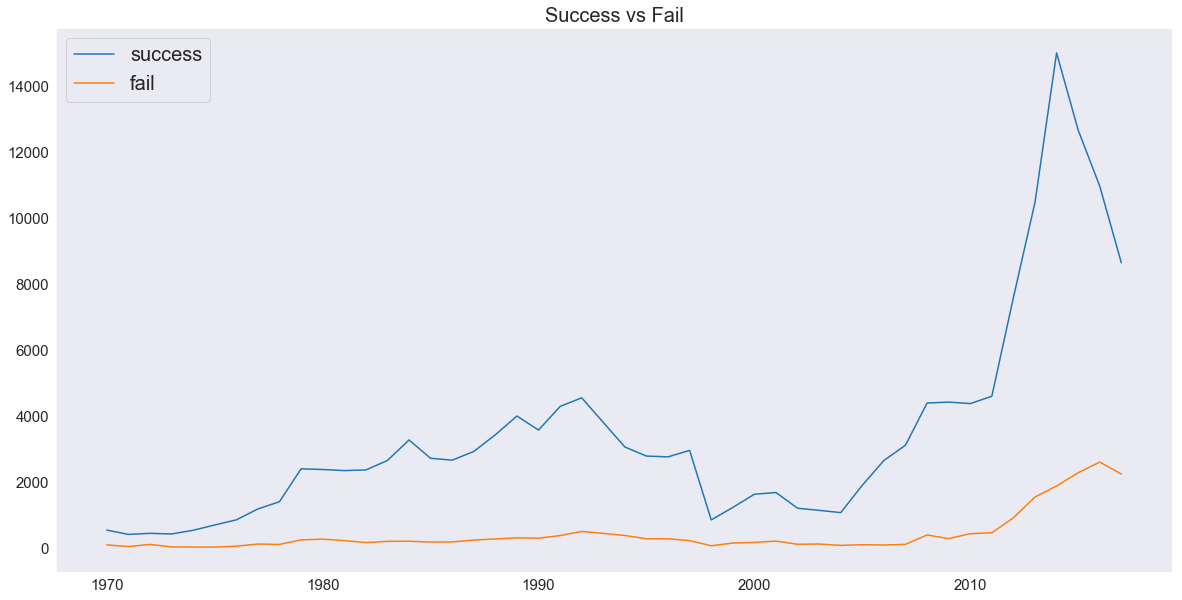

In [81]:
success_counts=glb[glb.success==1]['year'].value_counts().sort_index()
fail_counts=glb[glb.success==0]['year'].value_counts().sort_index()
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 15})
plt.title('Success vs Fail', fontsize = 20)
plt.plot(success_counts,label="success")
plt.plot(fail_counts,label="fail")
plt.legend(loc=2, prop={'size': 20})
plt.grid(False)
plt.show;

Text(0.5,1,'Success for each Attack Type')

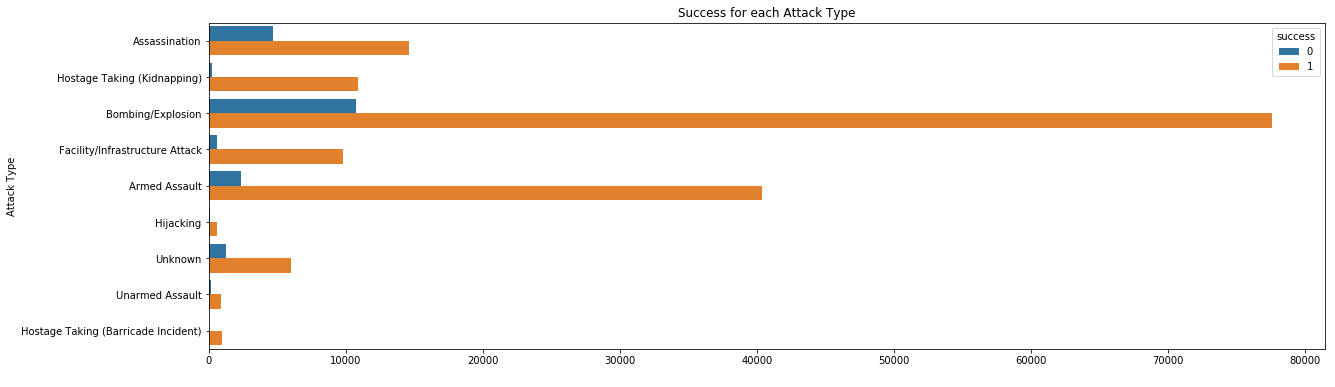

In [17]:
#Definition of successful attack depends on the type of attack.
sns.countplot(y='attack', data = glb, hue='success', orient = 'v')
plt.rcParams['figure.figsize'] = (20,6)
#plt.xticks(rotation=45)
plt.ylabel('Attack Type')
plt.xlabel(' ')
plt.title('Success for each Attack Type')

#### 2.5 Which attack types are popular?

''

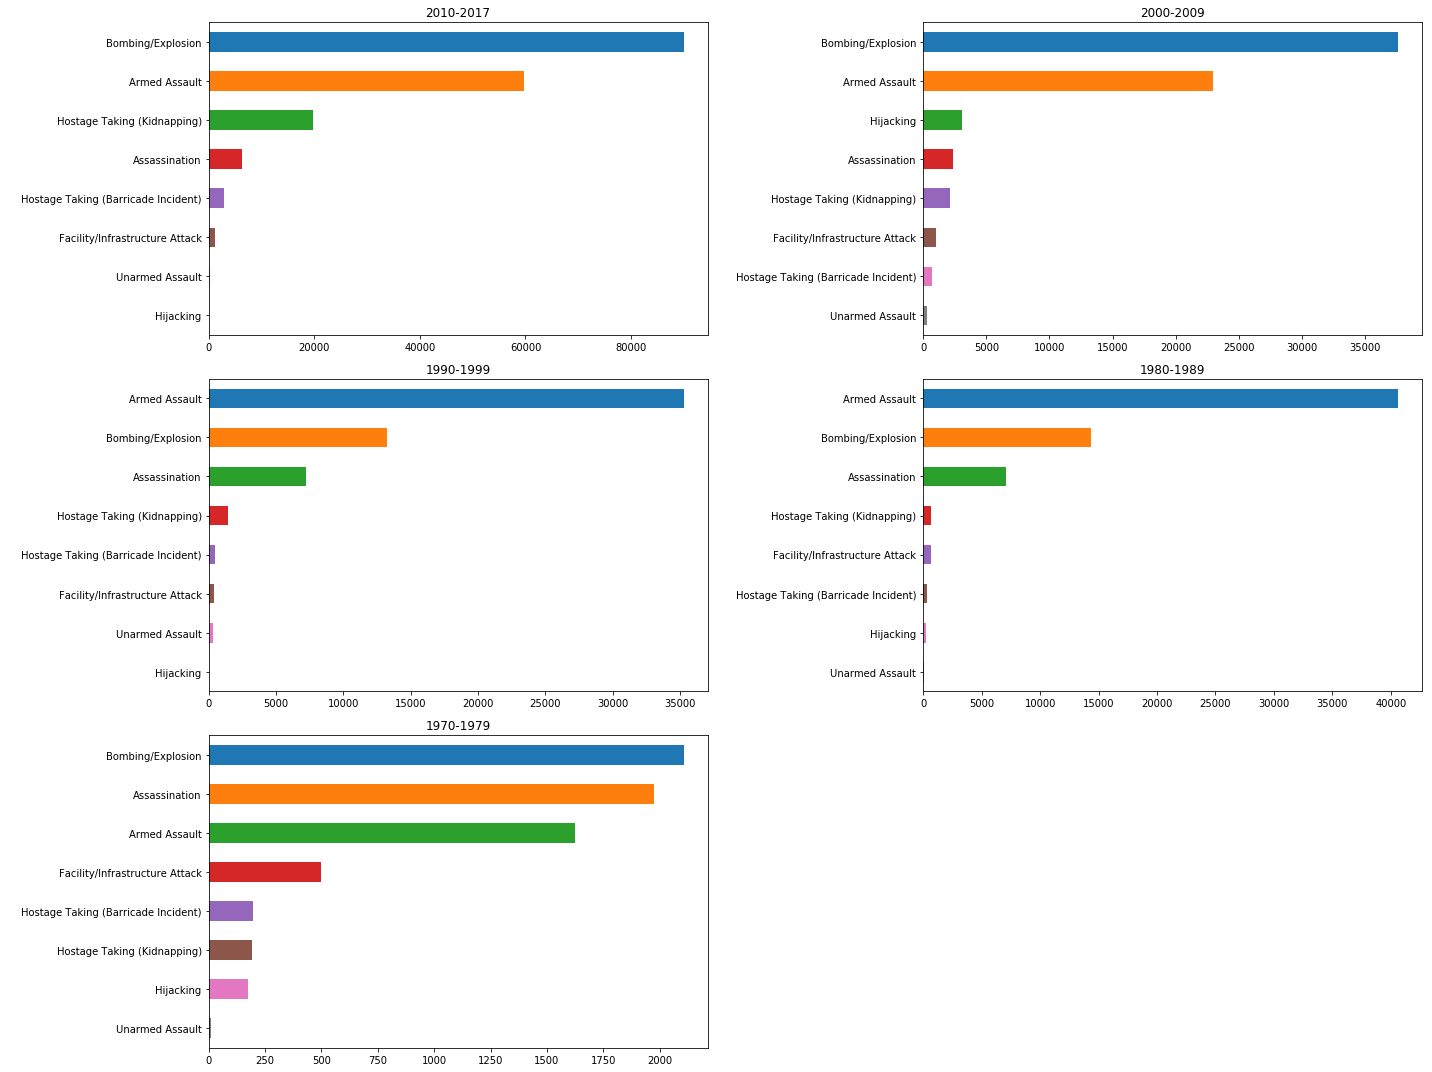

In [13]:
glb_a = glb[glb['attack'] != "Unknown"]
fig = plt.figure(figsize=(20,15))
contk1 = fig.add_subplot(3,2,1)
contk1.set_title('2010-2017')
ten_country = glb_a[glb_a['year'] >= 2010].groupby('attack')['kill'].sum().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="attack", y="id").invert_yaxis()
plt.ylabel(" ")
contk2 = fig.add_subplot(3,2,2)
contk2.set_title('2000-2009')
ten_country = glb_a[(glb_a['year']>= 2000) & (glb_a['year'] < 2010)].groupby('attack')['kill'].sum().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="attack", y="id").invert_yaxis()
plt.ylabel(" ")
contk3 = fig.add_subplot(3,2,3)
contk3.set_title('1990-1999')
ten_country = glb_a[(glb_a['year']>= 1990) & (glb_a['year'] < 2000)].groupby('attack')['kill'].sum().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="attack", y="id").invert_yaxis()
plt.ylabel(" ")
contk4 = fig.add_subplot(3,2,4)
contk4.set_title('1980-1989')
ten_country = glb_a[(glb_a['year']>= 1980) & (glb_a['year'] < 1990)].groupby('attack')['kill'].sum().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="attack", y="id").invert_yaxis()
plt.ylabel(" ")
contk5 = fig.add_subplot(3,2,5)
contk5.set_title('1970-1979')
ten_country = glb_a[(glb_a['year']>= 1970) & (glb_a['year'] < 1980)].groupby('attack')['kill'].sum().sort_values(ascending=False).head(10)
ten_country.plot.barh(x="attack", y="id").invert_yaxis()
plt.ylabel(" ")
fig.tight_layout()
;

* 1970 - 1979: Most used attack types are Bombing/Explosion, Assassination and Armed Assualt
* 1980 - 1989: Most used attack types are Armed Assualt, Bombing/Explosion and Assassination
* 1990 - 1999: Most used attack types are Armed Assualt, Bombing/Explosion and Assassination
* 2000 - 2009: Most used attack types are Bombing/Explosion, Armed Assualt and Hijacking
* 2010 - 2017: Most used attack types are Bombing/Explosion, Armed Assualt and Hostage Taking

### 3. Predictive Analysis

#### 3.1 Can casualties be predicted?

In [109]:
# Not only I want fatalities or wound, I want to add them to get the number of casualty.
glb['casualty'] = glb['kill']+glb['injuries']
# Binary value: Indicator if there was any casualty (0 = no, 1 = yes)
glb['has_cas'] = glb['casualty'].apply(lambda x: 0 if x == 0 else 1)


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [111]:
#non-numerical to numerical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
glb['country'] = lb.fit_transform(glb['country'])
glb['attack'] = lb.fit_transform(glb['attack'])
glb['target'] = lb.fit_transform(glb['target'])

# Create feature matrix (X).
feature_cols = ['target','longitude','year','latitude','property','attack','day','month']
X = glb[feature_cols].fillna(0)
# Create response vector (y).
y = glb['has_cas']


In [112]:
#split by  train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Instantiate the model
rfc = RandomForestClassifier(n_estimators=20)
#Fit the model with data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
#Store the predicted response values.
y_pred = rfc.predict(X_test)
np.mean(y_pred == y_test)

0.83778527922506785

Confusion matrix, without normalization
[[14050  4813]
 [ 4029 31616]]
Normalized confusion matrix
[[ 0.74  0.26]
 [ 0.11  0.89]]


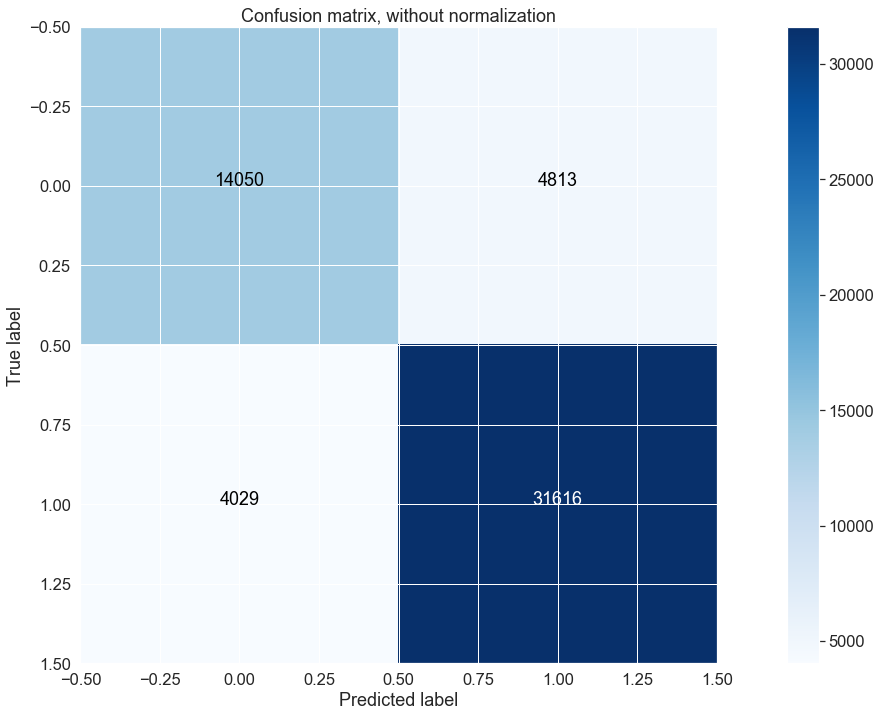

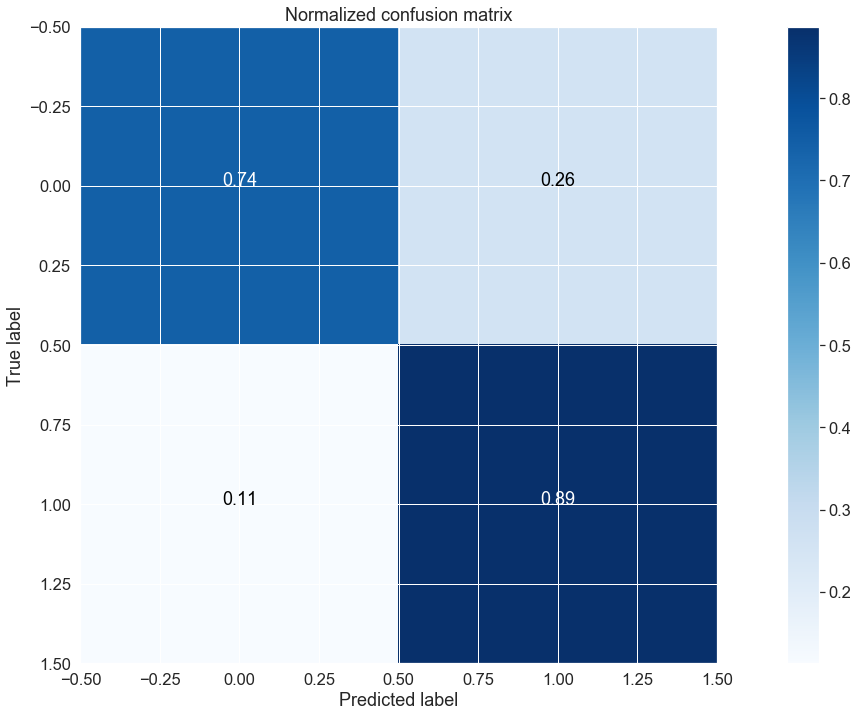

In [114]:
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    ax.figure.colorbar(im, ax=ax)
#Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)
 
# non-normalized

plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
 
# normalized

plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

#normalization vs scaling

Source : https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

* Accuracy is 0.837
* Precision: 0.81
* Recall: 0.82

In [115]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     18079
           1       0.89      0.87      0.88     36429

   micro avg       0.84      0.84      0.84     54508
   macro avg       0.82      0.82      0.82     54508
weighted avg       0.84      0.84      0.84     54508



#### 3.2 Can the suceess of an attack be predicted?

<function matplotlib.pyplot.show>

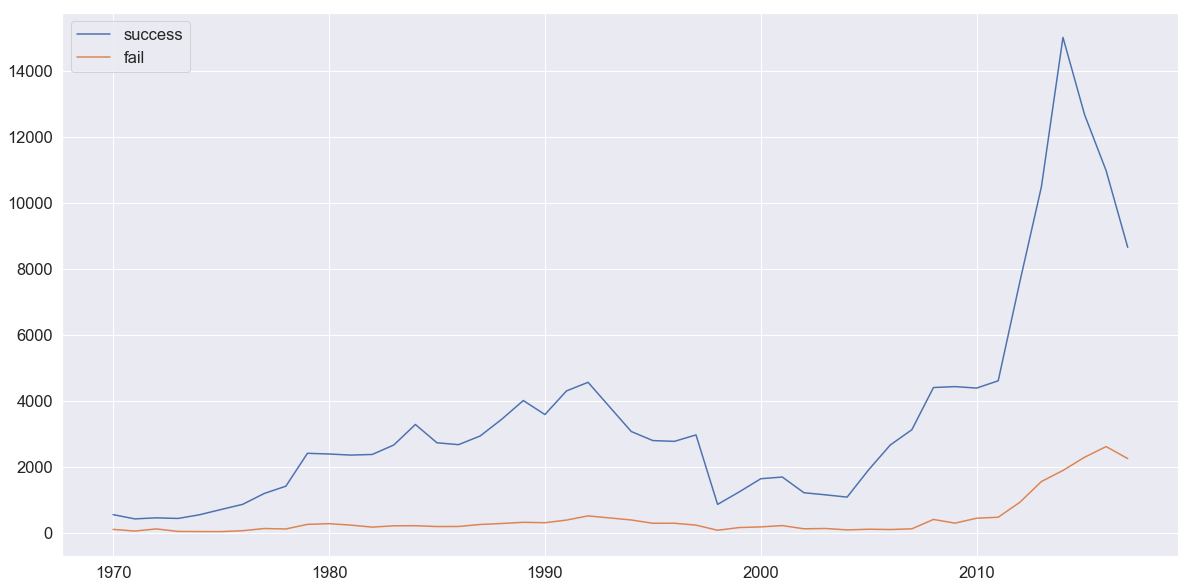

In [116]:
success=glb[glb.success==1]['year'].value_counts().sort_index()
fail_counts=glb[glb.success==0]['year'].value_counts().sort_index()
plt.plot(success,label="success")
plt.plot(fail_counts,label="fail")
plt.legend(loc=2)
plt.show

In [117]:
# Create feature matrix (X).
X = pd.concat([pd.get_dummies(glb['attack']), pd.get_dummies(glb['weapon'])], axis=1)
# Create response vector (y).
y= glb['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [118]:
# Instantiate the model
rfc = RandomForestClassifier(n_jobs=2, random_state=0)
# Fit the model with data.
rfc.fit(X_train, y_train);

C:\Users\rkim1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [119]:
# Store the predicted response values.
y_pred_class = rfc.predict(X_test)

np.mean(y_pred_class == y_test)


0.89529533496246394

In [120]:
from sklearn import metrics
print(metrics.classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.10      0.64      0.17       792
           1       0.99      0.90      0.94     44631

   micro avg       0.90      0.90      0.90     45423
   macro avg       0.55      0.77      0.56     45423
weighted avg       0.98      0.90      0.93     45423



* Accuracy: 0.895
* Precision: 0.90
* Recall: 0.90